In [1]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


In [2]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())  
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return set(tokens)

In [3]:
print(len(inaugural.fileids()))

60


In [4]:
text1 = inaugural.raw('2009-Obama.txt')
text2 = inaugural.raw('2013-Obama.txt')

In [5]:
set1 = preprocess(text1)
set2 = preprocess(text2)

In [6]:
jaccard_score = len(set1.intersection(set2)) / len(set1.union(set2))

print(f"Jaccard Similarity Score: {jaccard_score:.4f}")

Jaccard Similarity Score: 0.2104


## Between every pair (a lot of pairs)

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
files = inaugural.fileids()
processed_texts = {file: preprocess(inaugural.raw(file)) for file in files}

In [9]:
num_files = len(files)
jaccard_matrix = np.zeros((num_files, num_files))

In [10]:
for i in range(num_files):
    for j in range(num_files):
        if i <= j:
            set1, set2 = processed_texts[files[i]], processed_texts[files[j]]
            jaccard_score = len(set1.intersection(set2)) / len(set1.union(set2))
            jaccard_matrix[i, j] = jaccard_score
            jaccard_matrix[j, i] = jaccard_score

In [11]:
df_jaccard = pd.DataFrame(jaccard_matrix, index=files, columns=files)



In [12]:
print(df_jaccard.round(4))

                     1789-Washington.txt  1793-Washington.txt  1797-Adams.txt  \
1789-Washington.txt               1.0000               0.0482          0.1508   
1793-Washington.txt               0.0482               1.0000          0.0342   
1797-Adams.txt                    0.1508               0.0342          1.0000   
1801-Jefferson.txt                0.1441               0.0403          0.1503   
1805-Jefferson.txt                0.1220               0.0323          0.1505   
1809-Madison.txt                  0.1280               0.0336          0.1514   
1813-Madison.txt                  0.1076               0.0398          0.1082   
1817-Monroe.txt                   0.1527               0.0296          0.1828   
1821-Monroe.txt                   0.1375               0.0269          0.1811   
1825-Adams.txt                    0.1326               0.0290          0.1776   
1829-Jackson.txt                  0.1409               0.0563          0.1497   
1833-Jackson.txt            

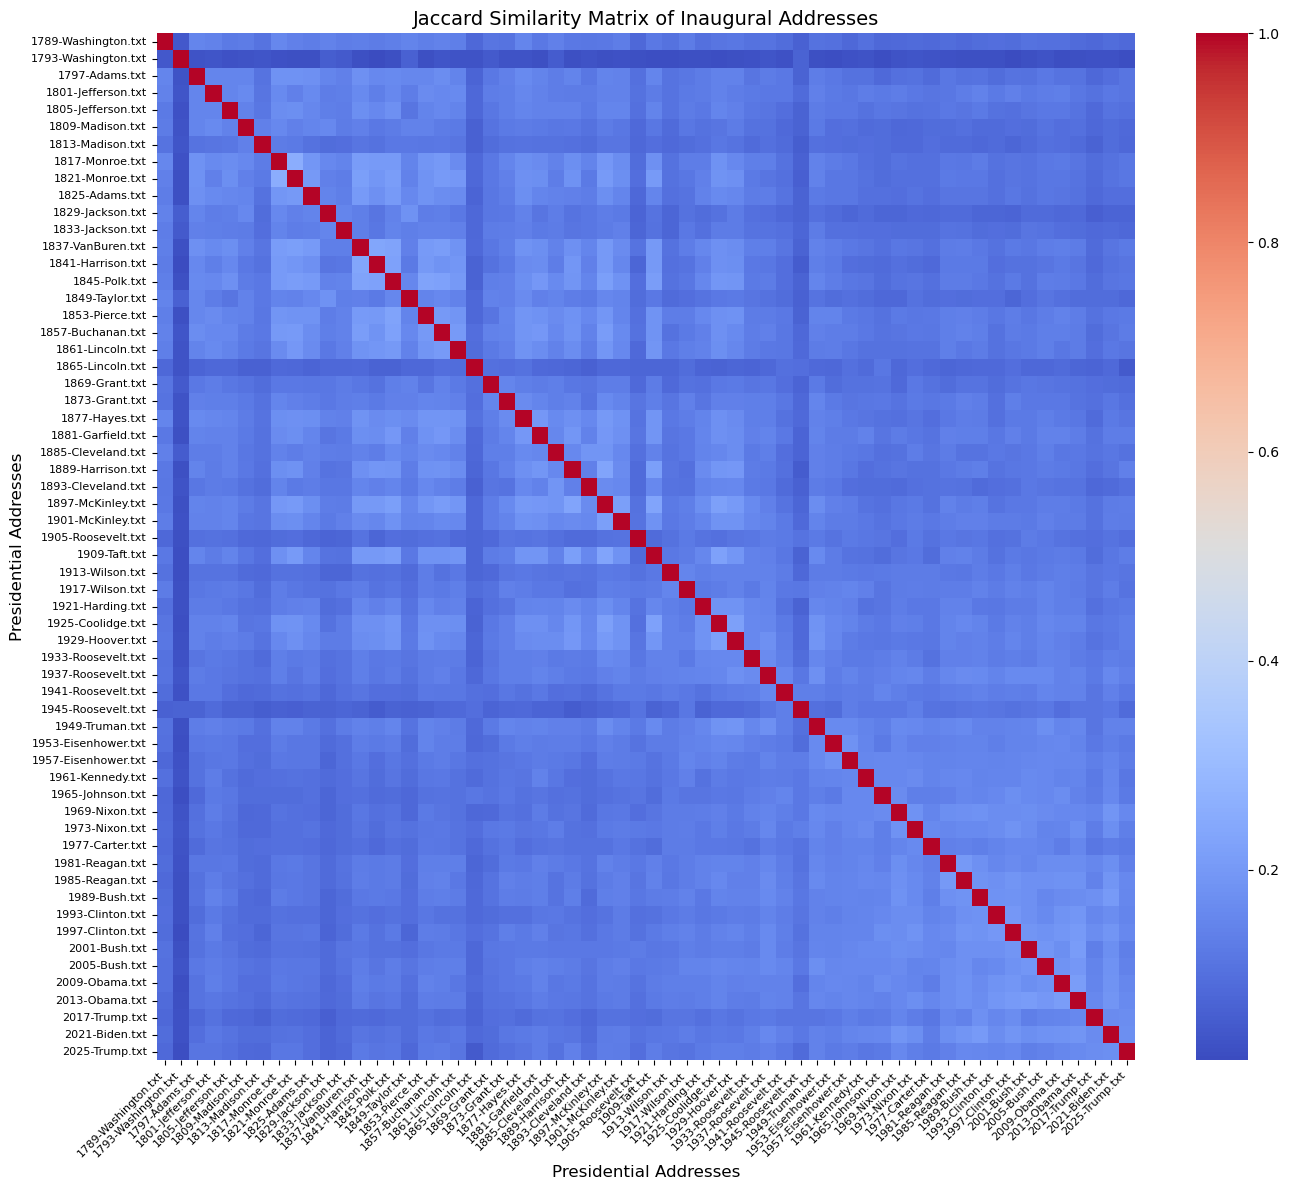

In [13]:
plt.figure(figsize=(14, 12)) 
ax = sns.heatmap(df_jaccard, cmap='coolwarm', annot=False, xticklabels=True, yticklabels=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)


plt.title("Jaccard Similarity Matrix of Inaugural Addresses", fontsize=14)
plt.xlabel("Presidential Addresses", fontsize=12)
plt.ylabel("Presidential Addresses", fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
# Convert Jaccard similarity matrix into a DataFrame of pairs
pairs = []
num_files = len(files)

for i in range(num_files):
    for j in range(i + 1, num_files):  # Avoid self-comparison and duplicates
        pairs.append((files[i], files[j], jaccard_matrix[i, j]))

# Convert to Pandas DataFrame
df_pairs = pd.DataFrame(pairs, columns=['Address 1', 'Address 2', 'Jaccard Score'])

# Sort by Jaccard Score in descending order
df_top10 = df_pairs.sort_values(by='Jaccard Score', ascending=False).head(10)

# Print top 10 most similar pairs
print(df_top10)


              Address 1          Address 2  Jaccard Score
392     1817-Monroe.txt    1821-Monroe.txt       0.257982
642   1837-VanBuren.txt  1841-Harrison.txt       0.234627
1244  1897-McKinley.txt      1909-Taft.txt       0.231983
1176  1889-Harrison.txt  1897-McKinley.txt       0.231020
643   1837-VanBuren.txt      1845-Polk.txt       0.226375
736       1845-Polk.txt    1853-Pierce.txt       0.226008
1338      1909-Taft.txt  1925-Coolidge.txt       0.222984
737       1845-Polk.txt  1857-Buchanan.txt       0.221873
689   1841-Harrison.txt      1845-Polk.txt       0.221696
1248  1897-McKinley.txt  1925-Coolidge.txt       0.220011
